In [5]:
import numpy as np
import scale.olm as olm

In [12]:
res=dict()
archive_data=dict()
for f in ['data/w17x17.h5','data/ge10x10-8.h5','data/vver440.h5','data/mox_w17x17.h5']:
    options = type('', (), {})()
    options.eps0=1e-20
    options.epsa=1e-1
    options.epsr=1e-1
    archive_data[f]=olm.Archive(f)
    c=olm.check.grid_gradient(archive_data[f],options)
    res[f]=c

loading archive file: data/w17x17.h5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:01<00:00,  9.67it/s]


calc_grid_gradient
initializing checkinfo


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 57954/57954 [00:35<00:00, 1655.24it/s]


loading archive file: data/ge10x10-8.h5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:14<00:00,  3.60it/s]


calc_grid_gradient
initializing checkinfo


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 57954/57954 [00:51<00:00, 1126.22it/s]


loading archive file: data/vver440.h5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  4.63it/s]


calc_grid_gradient
initializing checkinfo


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 57954/57954 [00:32<00:00, 1790.07it/s]


loading archive file: data/mox_w17x17.h5


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:03<00:00,  5.28it/s]


calc_grid_gradient
initializing checkinfo


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 57954/57954 [00:53<00:00, 1084.23it/s]


data/w17x17.h5 0.6302488947172662 0.9261490914249999


/Users/ww5/dev/scale/olm/scale/olm/check/check.py:83: RuntimeWarning: divide by zero encountered in log10
  plt.hist2d(np.log10(info.rhist),np.log10(info.ahist),bins=np.linspace(-40,20,100),cmin=1,alpha=0.2)


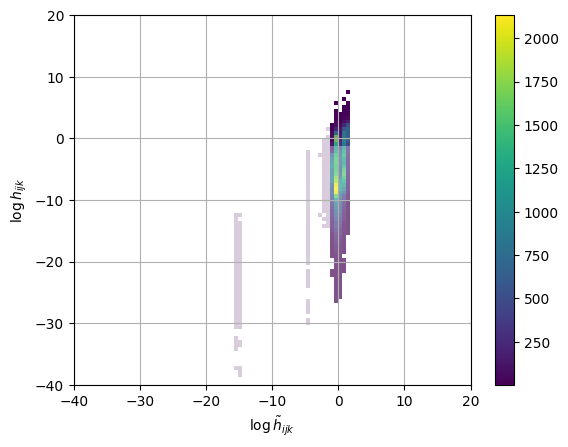

---
data/ge10x10-8.h5 0.3724083851943879 0.8712971590495143


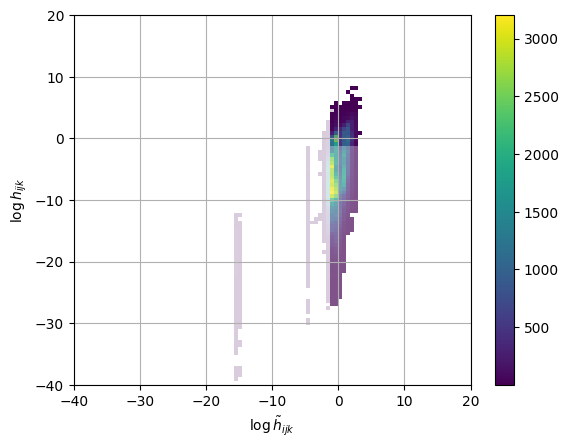

---
data/vver440.h5 0.8021534320323015 0.954244745832902


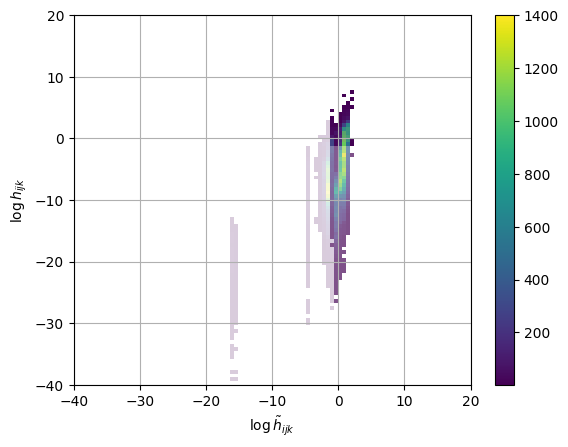

---
data/mox_w17x17.h5 0.6421245729371571 0.9303182265244849


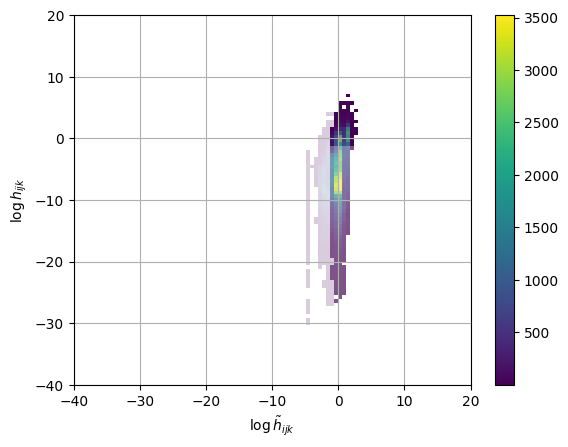

---


In [13]:
for f in res:
    print(f,res[f].q1,res[f].q2)
    olm.check.plot_grid_gradient_hist(res[f])
    print('---')

[0.5 1.5 2.  3.  4.  5.  6.  7.  8.  8.5] [0.723   0.75915] [0.0000000e+00 4.0000000e+01 1.0400000e+03 3.0000000e+03 5.0000000e+03
 7.5000005e+03 1.0500000e+04 1.3500000e+04 1.6500000e+04 1.9500000e+04
 2.2500000e+04 2.5500000e+04 2.8500000e+04 3.1500000e+04 3.4500000e+04
 3.7500000e+04 4.0500000e+04 4.3500000e+04 4.6500000e+04 4.9500000e+04
 5.2500000e+04 5.5500000e+04 5.8500000e+04 6.1500000e+04 6.4500000e+04
 6.7500000e+04 7.0500000e+04 7.3500000e+04 7.6500000e+04 7.9500000e+04
 8.2500000e+04]
(10, 2, 31)
3.0


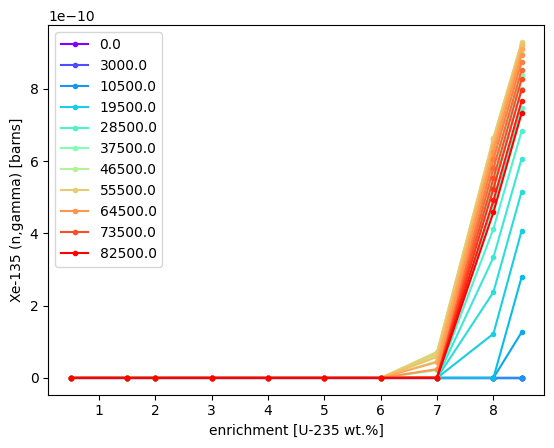

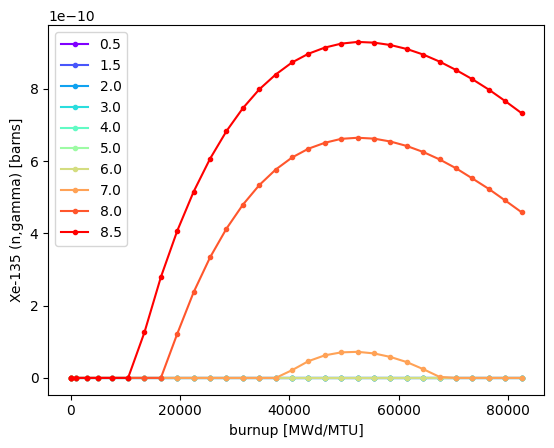

In [73]:
import matplotlib.pyplot as plt
archive=archive_data['data/w17x17.h5']
#j=45241 #transition
j=41114
ne=0 #enrichment axis
nm=1 #moderator density axis
nb=2 #burnup axis
print(*archive.axes_values)
y=archive.coeff[...,:,j]
yin=y #/archive.coeff[...,0:1,j] #normalize to t=0
print(np.shape(yin))
colors = plt.cm.rainbow(np.linspace(0, 1, archive.axes_shape[nb]))
mod0 = 1+np.floor(len(colors)/11)
print(mod0)
for ib in range(archive.axes_shape[nb]):
    bu = archive.axes_values[nb][ib]
    label=str(bu)
    if ib%mod0!=0:
        label='_nolegend_'
    im=0
    plt.plot(archive.axes_values[ne],yin[:,im,ib],marker='.', color=colors[ib], label=label)
plt.legend()
plt.ylabel('Xe-135 (n,gamma) [barns]')
plt.xlabel('enrichment [U-235 wt.%]')
plt.show()

colors = plt.cm.rainbow(np.linspace(0, 1, archive.axes_shape[ne]))
mod0 = 1+np.floor(len(colors)/11)
for ie in range(archive.axes_shape[ne]):
    e = archive.axes_values[ne][ie]
    c='-'
    label=str(e)
    if ie%mod0!=0:
        label='_nolegend_'
    plt.plot(archive.axes_values[nb],y[ie,0,:],c,marker='.',color=colors[ie],label=label)
plt.legend()
plt.ylabel('Xe-135 (n,gamma) [barns]')
plt.xlabel('burnup [MWd/MTU]')
plt.show()

In [ ]:
rel_axes=list()
for x_list in archive.axes_values:
    dx=x_list[-1]-x_list[0]
    x0 = x_list[0]
    z=list()
    for x in x_list:
        z.append((x-x0)/dx)
    rel_axes.append(z)
print(rel_axes)


In [ ]:
yp=np.asarray(np.gradient(yin,*rel_axes))
print(np.shape(yp))

#gradients
#burnup plots
ib=None
for ie in range(archive.axes_shape[ne]):
    for im in range(archive.axes_shape[nm]):
        #print(archive.axes_values[ne][ie],archive.axes_values[nm][im],yp[0,ie,im,:])
        plt.plot(archive.axes_values[nb],yp[0,ie,im,:])
plt.title('gradients vs. burnup')
plt.show()

#enrichment
ie=None
for im in range(archive.axes_shape[nm]):
    for ib in range(archive.axes_shape[nb]):
        plt.plot(archive.axes_values[ne],yp[0,:,im,ib])
plt.title('gradients vs. enrichment')
plt.show()


In [ ]:
for i in range(2):
    ypp=np.asarray(np.gradient(yp[i,:,:],axis=i))
    print(np.shape(ypp))
    for j in range(10):
        plt.plot(archive.axes_values[2],ypp[j,0,:])
plt.title('vs. burnup')
plt.show()

In [ ]:
for i in range(3):
    ypp=np.asarray(np.gradient(yp[i,:,:,:],axis=2))
    print(np.shape(ypp))
    for j in range(10):
        plt.plot(archive.axes_values[2],ypp[j,0,:])
    plt.title(archive.axes_names[i])
    plt.show()

In [ ]:
deriv[10161]

In [ ]:
plt.hist(rhist, bins=np.linspace(0,np.amax(rhist),100), histtype=u'step',density=False,log=True)
plt.show()

In [ ]:
plt.hist(ahist, bins=np.linspace(0,np.amax(ahist),100), histtype=u'step',density=False,log=True)
plt.show()

In [ ]:
plt.scatter(np.log10(rhist),np.log10(ahist),color='black',s=0.1,alpha=0.05)
plt.xlabel(r'$\log \tilde{h}_{ijk}$')
plt.ylabel(r'$\log h_{ijk}$')
plt.xlim(-40,20)
plt.ylim(-40,20)
plt.show()

In [ ]:
rmin=1e-1
amin=1e-1
ind = (rhist>rmin) | (ahist>amin)
plt.hist2d(np.log10(rhist),np.log10(ahist),bins=np.linspace(-40,20,100),cmin=1,alpha=0.5)
h=plt.hist2d(np.log10(rhist[ind]),np.log10(ahist[ind]),bins=np.linspace(-40,20,100),cmin=1,alpha=1.0)
plt.colorbar(h[3])
plt.xlabel(r'$\log \tilde{h}_{ijk}$')
plt.ylabel(r'$\log h_{ijk}$')
plt.grid()
plt.show()

In [69]:
ts=archive.h5['incident']['neutron']['TransitionStructure']
dc=archive.h5['decay']
target_tind2 = 45241
mt=ts['transition_ids'][target_tind2]
parent_pos = ts['parent_positions'][target_tind2]
nuclide_id=dc['nuclide_list'][parent_pos-1]
print(nuclide_id,mt)

30054135 102


In [66]:
from tqdm import tqdm
for tind in tqdm(range(len(ts['transition_ids']))):
    #print(tind)
    mt=ts['transition_ids'][tind]
    parent_pos = ts['parent_positions'][tind]
    nuclide_id=dc['nuclide_list'][parent_pos-1]
    if nuclide_id==30054135 and mt==102:
        target_tind=tind
        print(tind,nuclide_id,mt)

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 45409/57954 [00:48<00:12, 1025.83it/s]

45241 30054135 102


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 57954/57954 [01:00<00:00, 965.81it/s]


In [67]:
target_tind

45241

20092234